<a href="https://colab.research.google.com/github/ahmedmohtadi/communictain_lab_using_python/blob/main/CommSyslab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Communication systems Laboratory

#### Name:-  Ahmed Mohtadi (314887) und Zakaria Sadiki (314460)

#### Date:-  14/07/2023

General Information
In this lab, we construct a receiver for a DBPSK signal in the 868 MHz ISM band using the
RTL-SDR (software defined radio). The signals we receive are generated in MATLAB and
downloaded to a Rohde & Schwarz signal generator. The output is connected to a rod
antenna.\\1.1.PNG
The figures below show the signal generator with antenna, the display of the signal generator
where you can see the transmit frequency and power, and the RTL-SDR connected to a PC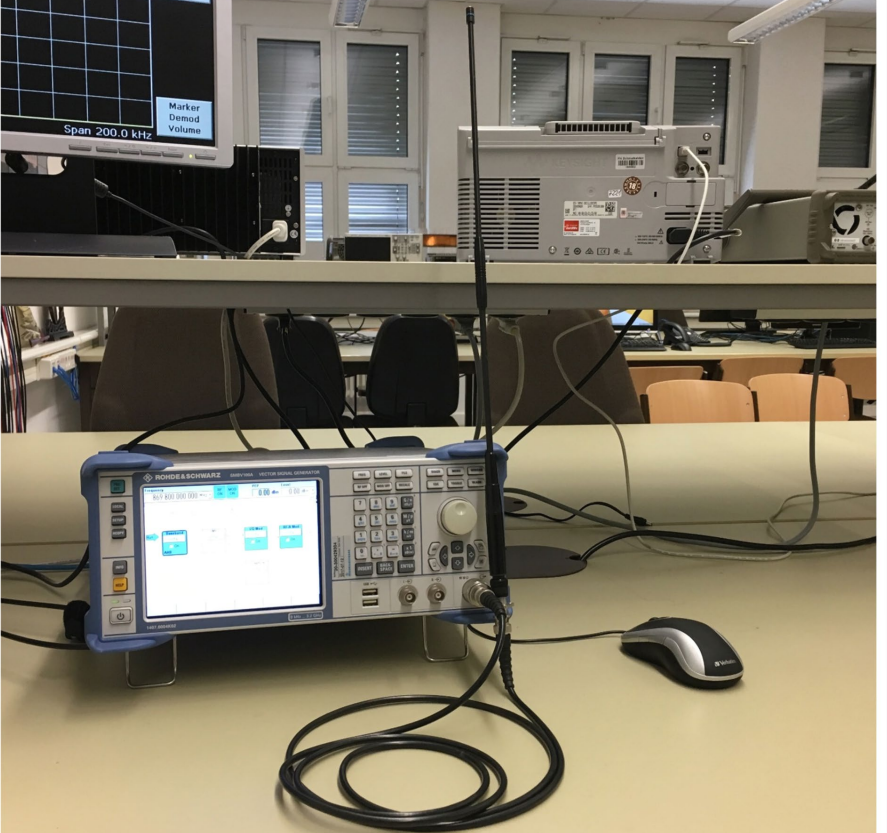






The RTL-SDR is used together with MATLAB/Simulink. A Simulink model used to record
the signals, you can see that the carrier frequency is set to 869.8 MHz. The sampling rate of
the RTL-SDR is set to 256 kHz. The RTL-SDR transfers the samples in frames via the USB
interface to MATLAB/Simulink. The frame size is set to 4096 samples per frame.
In MATLAB, the variable "signal", a structure, holds the samples. The command
"save('filename', signal)" saves the structure in a mat-file. This file will be imported into
Python for further processing


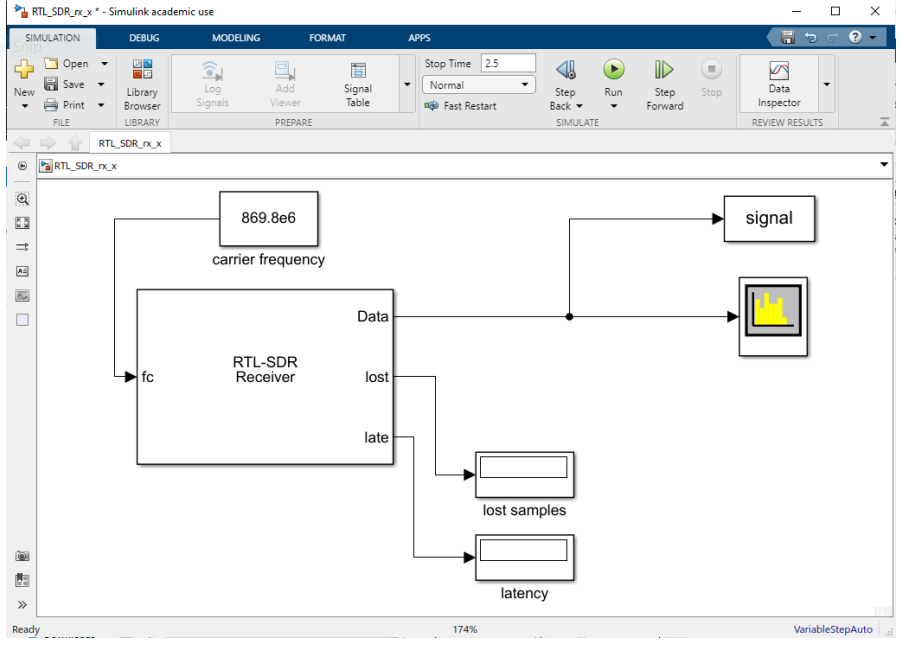

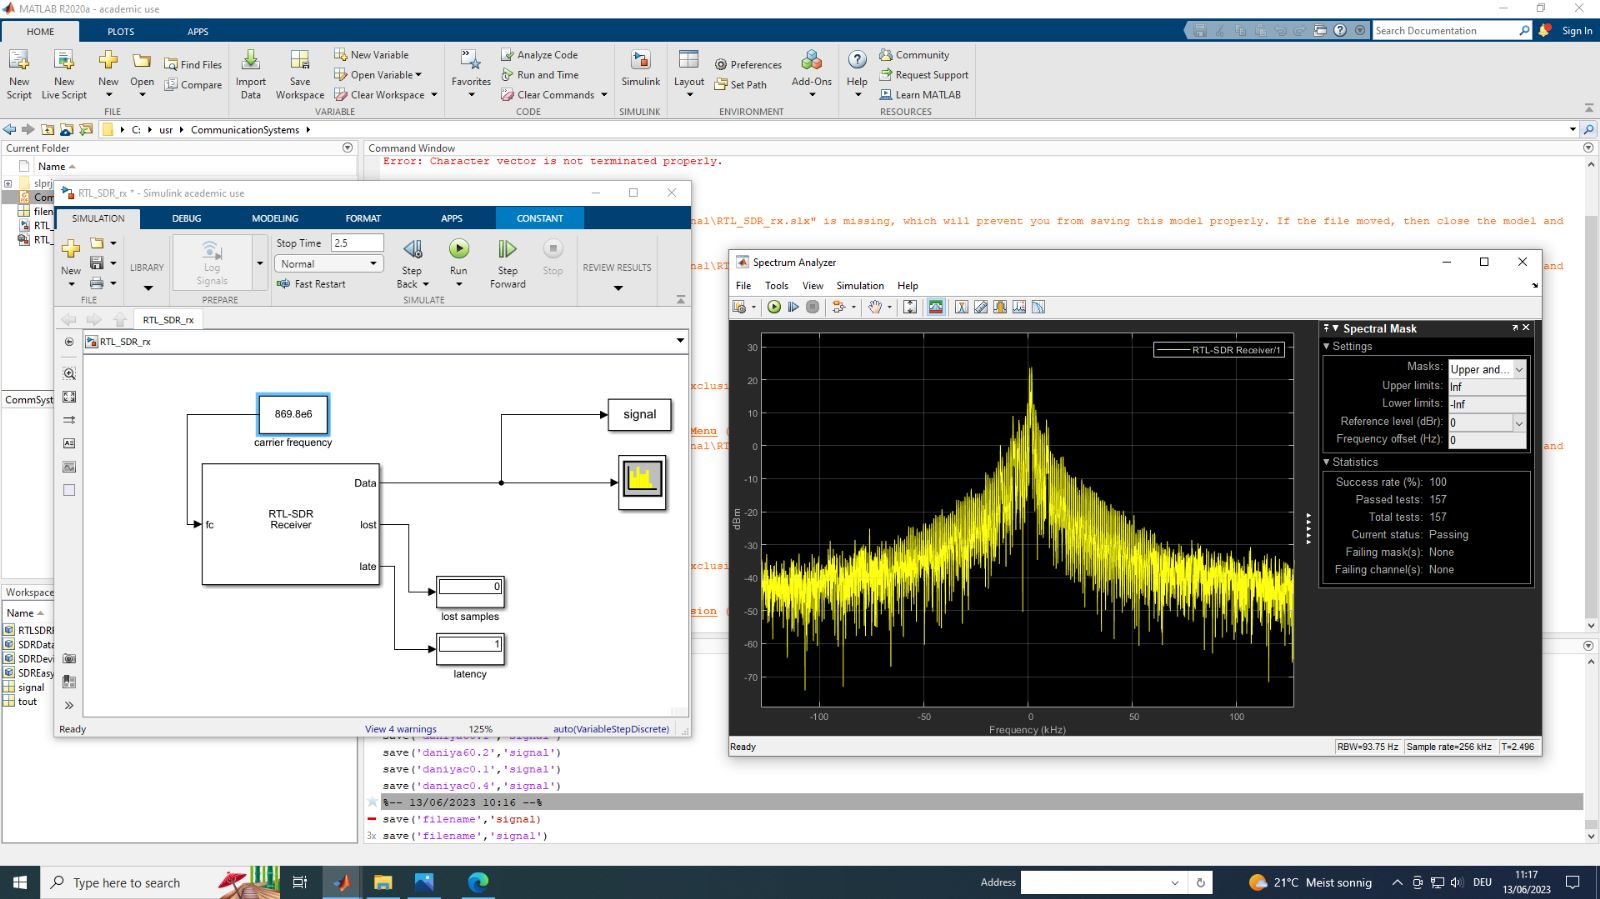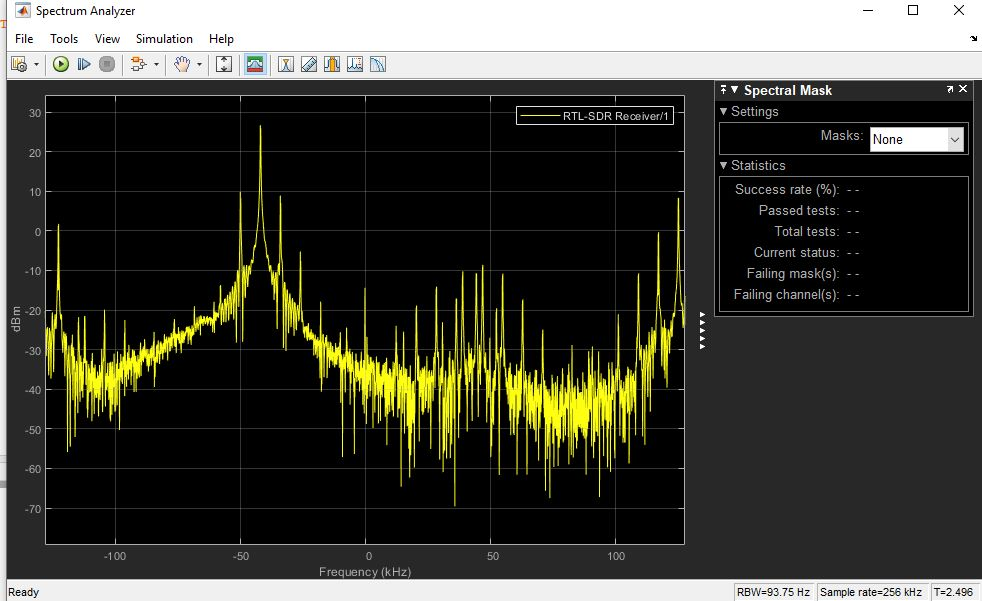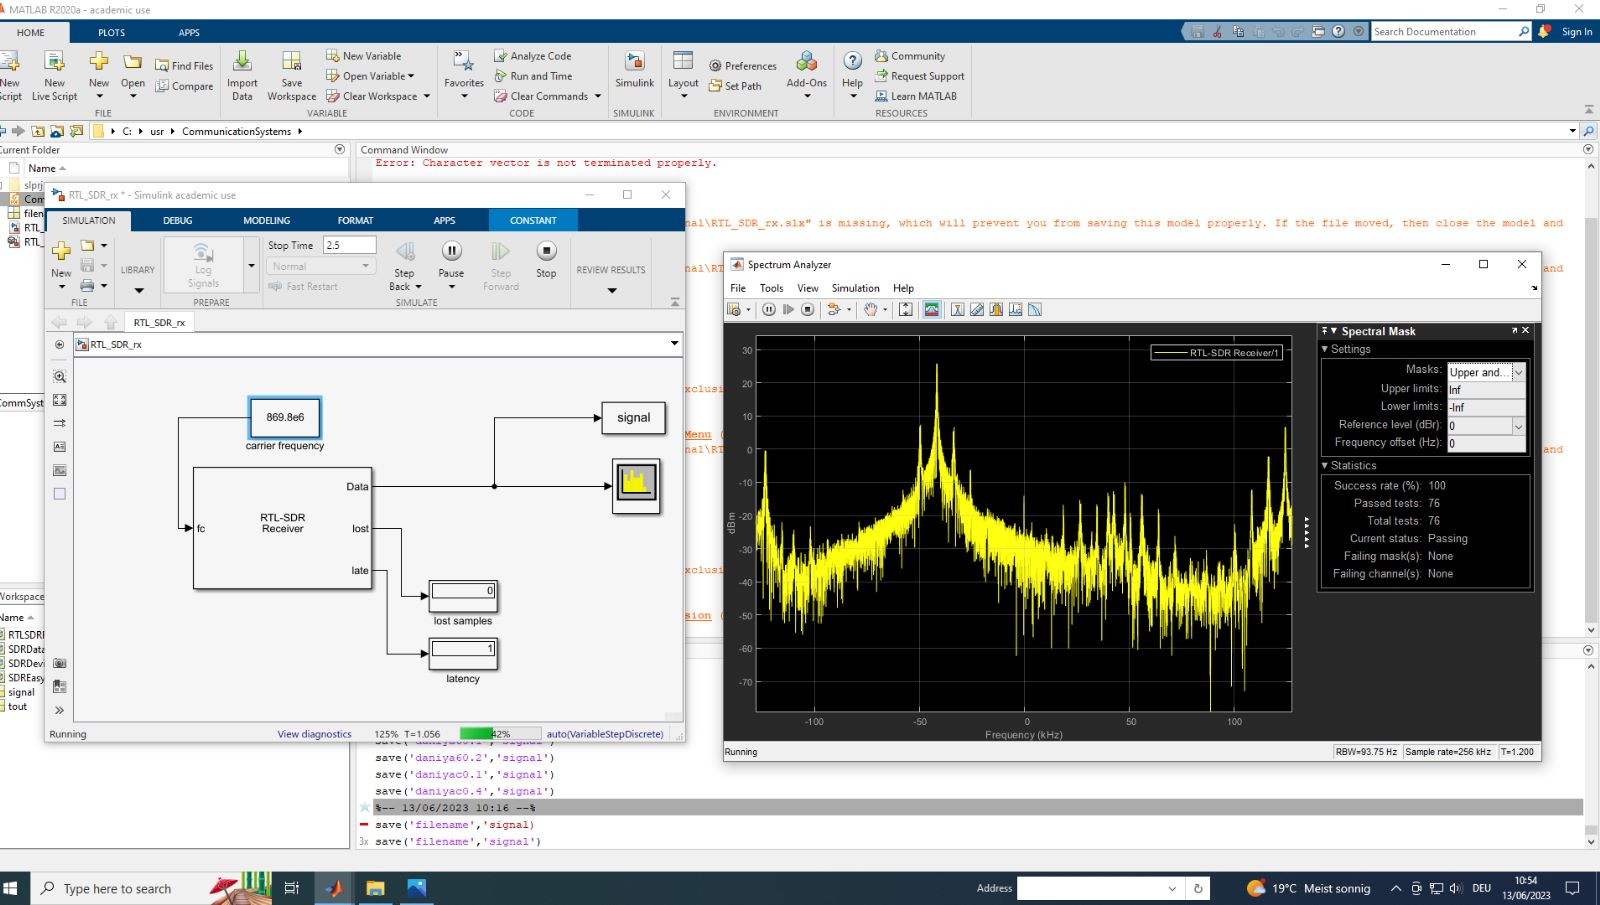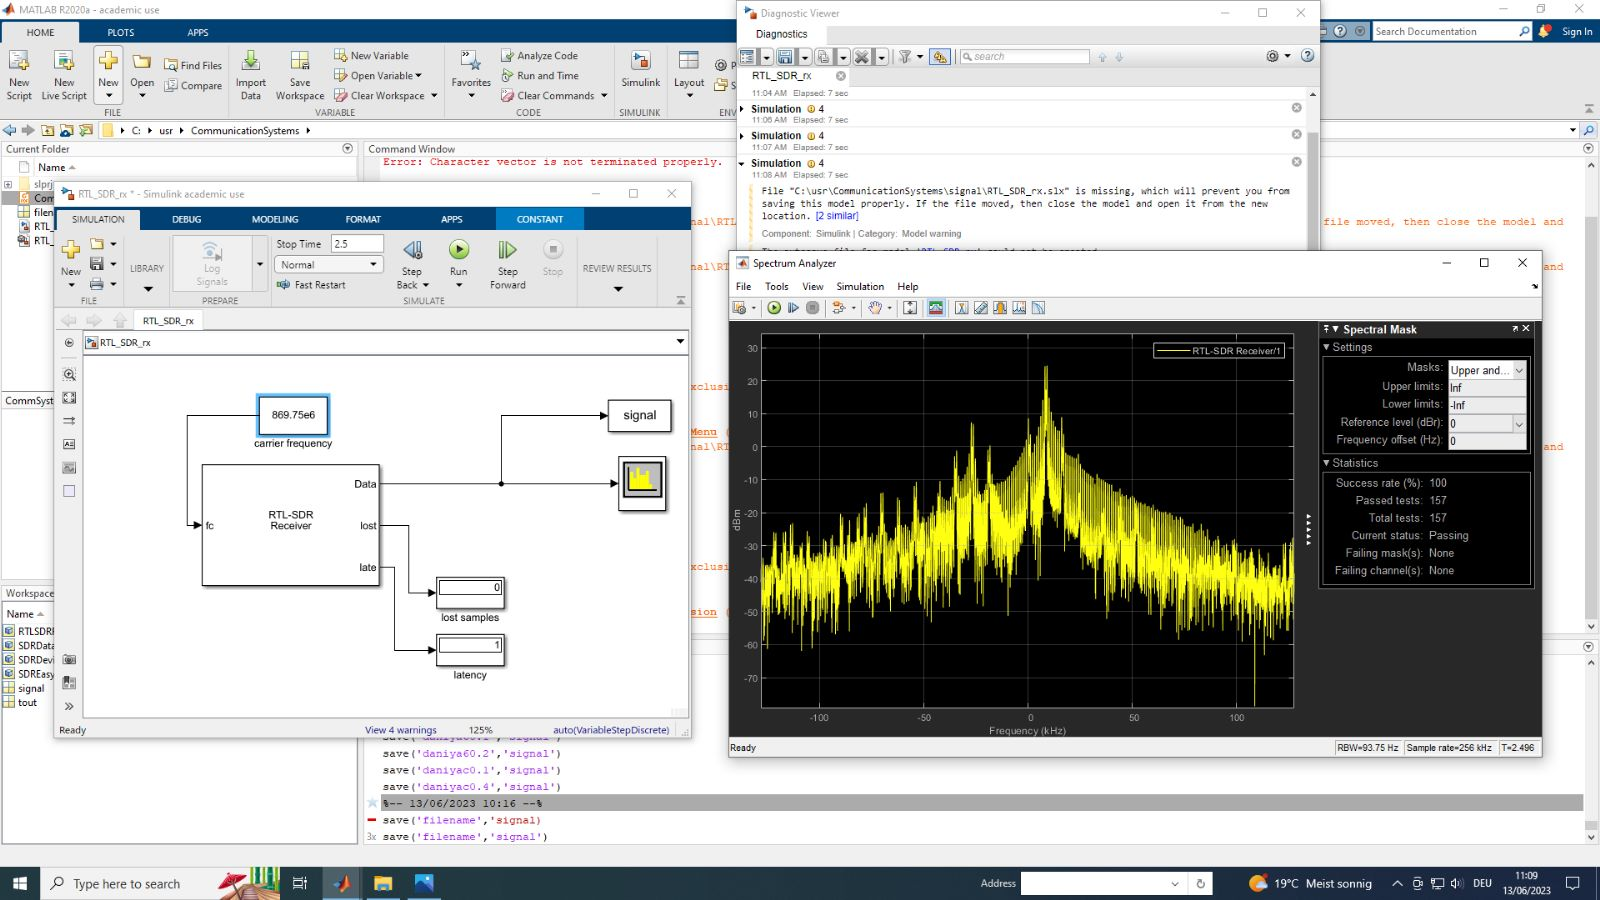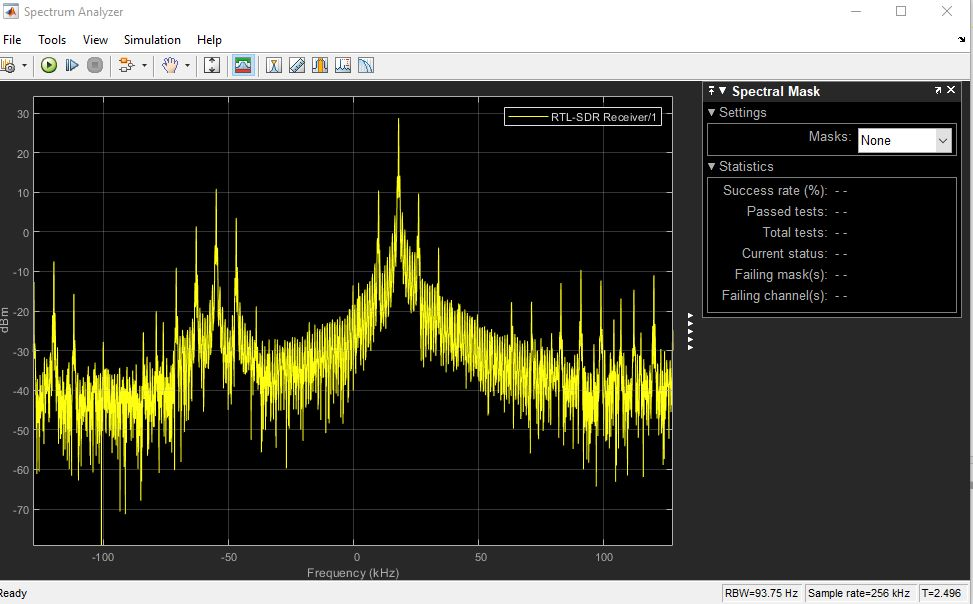

# The First Section

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

In [ ]:
nsamples = 33
fs = 8000
f0 = 1000
time = np.arange(float(nsamples))/fs
sine1 = np.sin(2*np.pi*f0*time)

In [ ]:
sine1

array([ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        1.22464680e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -2.44929360e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        3.67394040e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -4.89858720e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        6.12323400e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -7.34788079e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        8.57252759e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -9.79717439e-16])

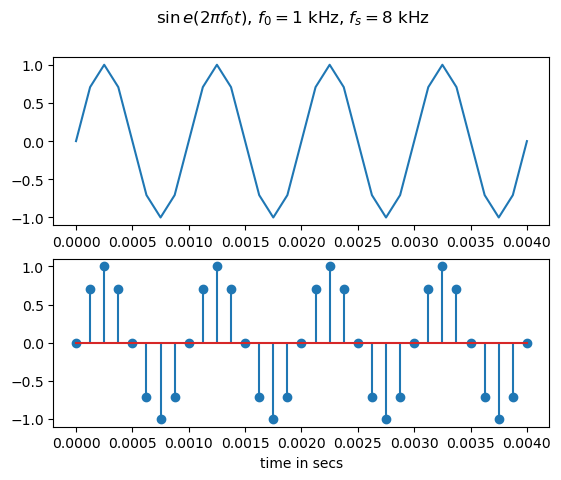

In [ ]:
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(time, sine1)
plt.subplot(2, 1, 2)
plt.stem(time, sine1)
plt.xlabel('time in secs')
plt.suptitle('$\sine(2\pi f_0 t)$, $f_0 = 1$ kHz, $f_s = 8$ kHz')
plt.show()

In [ ]:
nsamples = 16000
fs = 8000
f0 = 1000
time = np.arange(float(nsamples))/fs
sine1 = np.sin(2*np.pi*f0*time)

In [ ]:
sine1

array([ 0.        ,  0.70710678,  1.        , ..., -0.70710678,
       -1.        , -0.70710678])

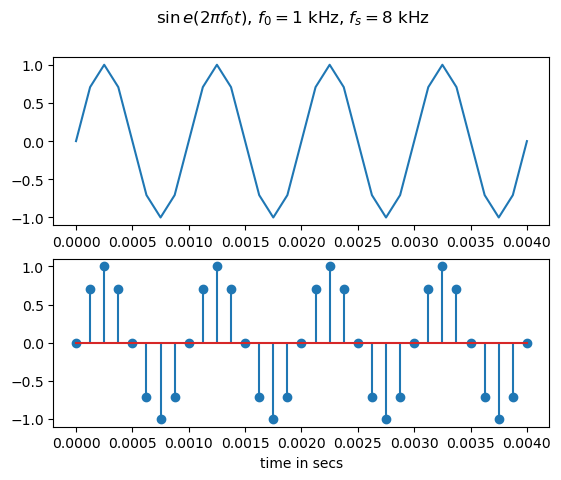

In [ ]:
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(time[0:33], sine1[0:33])
plt.subplot(2, 1, 2)
plt.stem(time[0:33], sine1[0:33])
plt.xlabel('time in secs')
plt.suptitle('$\sine(2\pi f_0 t)$, $f_0 = 1$ kHz, $f_s = 8$ kHz')
plt.show()

In [ ]:
Audio(sine1, rate = fs)

In [ ]:
noise = np.random.normal(0, 0.1, nsamples)
sine2 = sine1 + noise

In [ ]:
Audio(sine2, rate = fs)

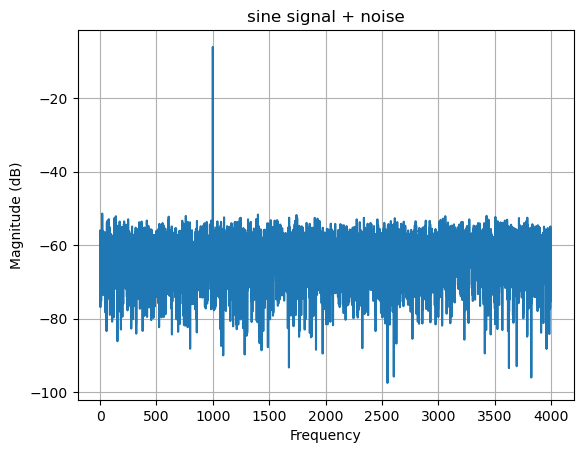

In [ ]:
plt.magnitude_spectrum(sine2, Fs = fs, scale = 'dB')
plt.title('sine signal + noise')
plt.grid()
plt.show()

## Experiment 2

# 2.The Spectrum of the RTL-SDR Signal ( The Second Section)


## 2.1 A first View of the Signal

Import an RTL-SDR signal

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as scs
from scipy.io import loadmat

In [ ]:
fs = 256e3
frame_size = 4096
# load mat file
matfile = loadmat("C:/Users/Tanmay/Downloads/commsys_2023_1.mat")
matfile

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Di Apr 25 12:53:29 2023',
 '__version__': '1.0',
 '__globals__': [],
 'signal': array([[ 0.       -0.0078125j, -0.015625 +0.j       ,
          0.       -0.0078125j, ..., -1.       -0.5859375j,
         -1.       +0.859375j ,  0.203125 +0.9921875j],
        [ 0.9921875+0.5078125j,  0.9921875-0.9296875j,
         -0.2890625-1.j       , ...,  0.9921875+0.9921875j,
          0.9921875-0.3828125j,  0.328125 -1.j       ],
        [-1.       -0.9453125j, -1.       +0.4609375j,
         -0.2578125+0.9921875j, ...,  0.7421875+0.9921875j,
          0.9921875-0.0625j   ,  0.6171875-1.j       ],
        ...,
        [-0.6171875-1.j       , -1.       -0.078125j ,
         -0.734375 +0.9921875j, ..., -0.953125 -1.j       ,
         -1.       +0.3125j   , -0.3984375+0.9921875j],
        [ 0.9921875+0.9921875j,  0.9921875-0.3984375j,
          0.3046875-1.j       , ...,  0.9921875+0.6640625j,
          0.9921875-0.78125j  , -0.09375

In [ ]:
# extract smaples
signal = matfile['signal']
print(signal.shape)

(157, 4096)


In [ ]:
#reshape matrix
signal = signal.reshape(1, 157*frame_size)
print(signal.shape)
signal

(1, 643072)


array([[ 0.      -0.0078125j, -0.015625+0.j       ,  0.      -0.0078125j,
        ..., -1.      -0.1640625j, -0.828125+0.9921875j,
         0.609375+0.9921875j]], dtype=complex64)

In [ ]:
# convert to vector
signal = signal[0, :]
signal

array([ 0.      -0.0078125j, -0.015625+0.j       ,  0.      -0.0078125j,
       ..., -1.      -0.1640625j, -0.828125+0.9921875j,
        0.609375+0.9921875j], dtype=complex64)

In [ ]:
# number of smaples
nsamples = len(signal)
print("nsamples =", nsamples)

nsamples = 643072


Spectrum of the signal

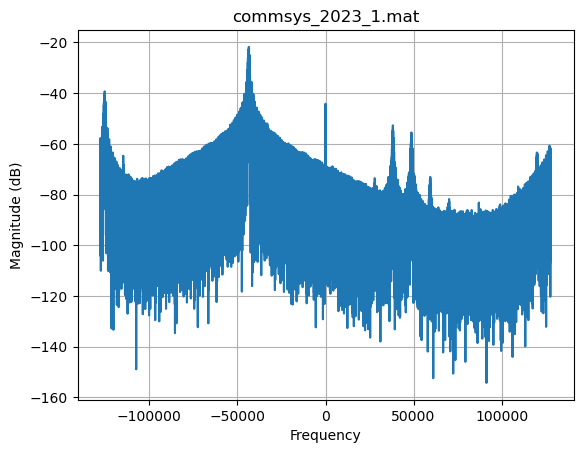

In [ ]:
mag_freq = plt.magnitude_spectrum(signal, Fs = fs, scale = 'dB')
#plt.magnitude_spectrum(signal, Fs = fs)
plt.title('commsys_2023_1.mat')
plt.grid()
plt.show()

## 2.2 Estimating the Frequency offset

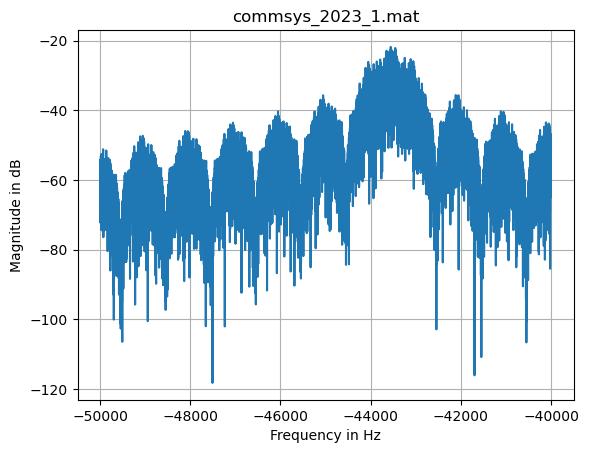

In [ ]:
#Plot spectrum in the frequency range f_low ... f_high

f_low = -50e3
f_high = -40e3

mag = mag_freq[0]
freq = mag_freq[1]

x1 = int(nsamples/2 + f_low*nsamples/fs)
x2 = int(nsamples/2 + f_high*nsamples/fs)
freq_zoom = freq[x1:x2]
mag_zoom = mag[x1:x2]

plt.plot(freq_zoom, 20*np.log10(mag_zoom))
plt.title('commsys_2023_1.mat')
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in dB')
plt.grid()
plt.show()

## 2.3 Coarse frequency correction

In [ ]:
# Test complex exponential
np.exp(1j*np.pi/2)

(6.123233995736766e-17+1j)

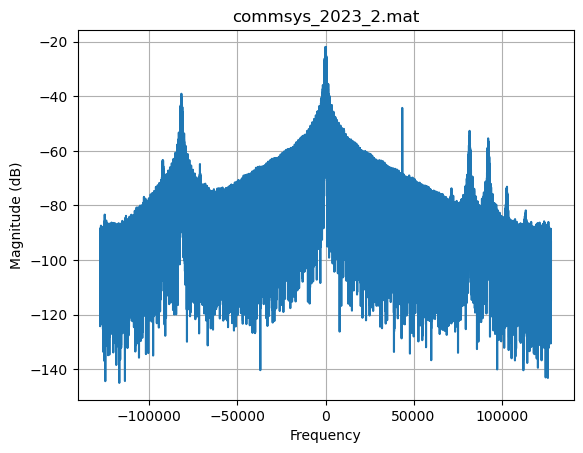

In [ ]:
delta_f = -43553
time = np.arange(float(nsamples))/fs
exp_corr = np.exp(-2j*np.pi*delta_f*time)
signal_corr = signal*exp_corr

mag_freq = plt.magnitude_spectrum(signal_corr, Fs = fs, scale = 'dB')
#plt.magnitude_spectrum(signal_corr, Fs = fs)
plt.title('commsys_2023_2.mat')
plt.grid()
plt.show()

# Experiment 3:- Demodulator and Matched Filter

## 3.1 Baseband Filter

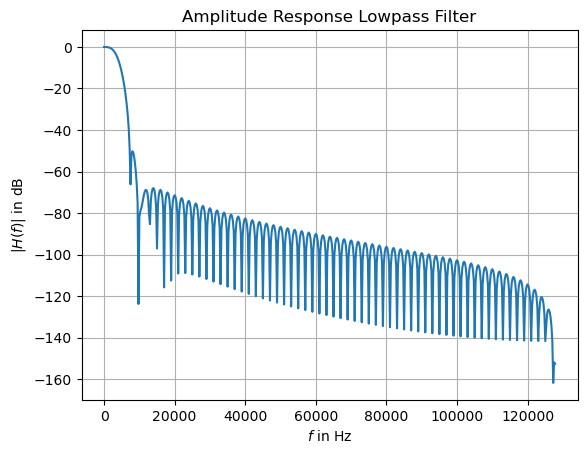

In [ ]:
b_LP = scs.firwin(128, 4e3/(fs/2))
f_LP, H_LP = scs.freqz(b_LP, fs = fs)
plt.plot(f_LP, 20*np.log10(abs(H_LP)))
plt.grid()
plt.title('Amplitude Response Lowpass Filter')
plt.xlabel('$f$ in Hz')
plt.ylabel('$|H(f)|$ in dB')
plt.show()

In [ ]:
#Filter signal_corr
signal_flt = scs.lfilter(b_LP, 1, signal_corr)
#Skip first 2000 samples
signal_flt = signal_flt[2000:nsamples]

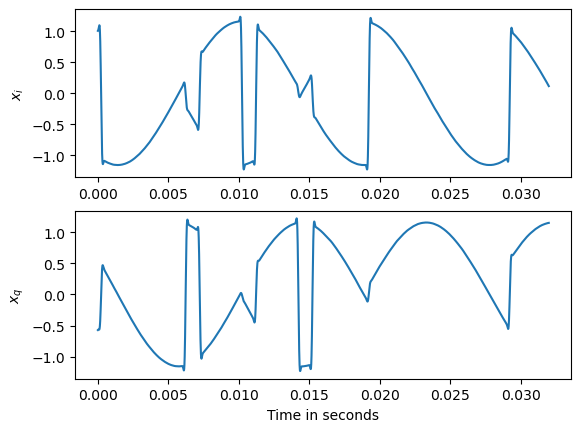

In [ ]:
#Plot quadrature components
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(time[0:2*frame_size], np.real(signal_flt[0:2*frame_size]))
plt.ylabel('$x_i$')
plt.subplot(2, 1, 2)
plt.plot(time[0:2*frame_size], np.imag(signal_flt[0:2*frame_size]))
plt.ylabel('$x_q$')
plt.xlabel('Time in seconds')
plt.show()

In [ ]:
#Downsampling by 16 (16 samples/symbol)
signal_dsl = scs.decimate(signal_flt, 16, n=0, ftype = 'fir')
nsamples_dsl = len(signal_dsl)
print("nsamples_dsl =", nsamples_dsl)

nsamples_dsl = 40067


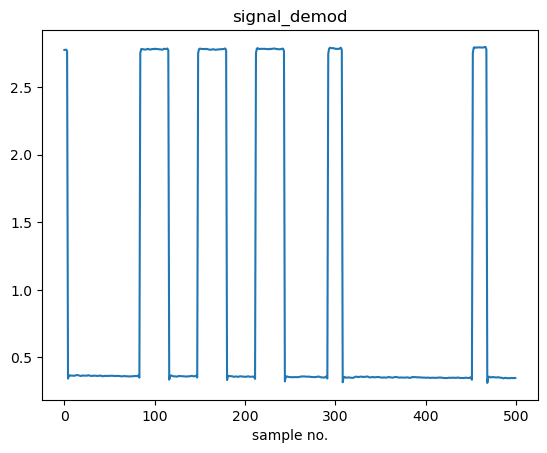

In [ ]:
signal_demod = abs(np.angle(signal_dsl[16:nsamples_dsl]*np.conj(signal_dsl[0:(nsamples_dsl - 16)])))

plt.plot(signal_demod[0:500])
plt.title('signal_demod')
plt.xlabel('sample no.')
plt.show()

nsamples_mf = 40051


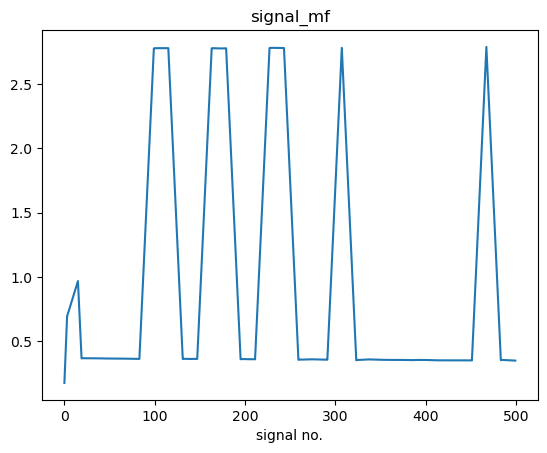

In [ ]:
# Matched filter, 16 samples/symbol
osr = 16
signal_mf = scs.lfilter(np.ones(osr)/osr, 1, signal_demod)
nsamples_mf = len(signal_mf)
print("nsamples_mf =", nsamples_mf)

plt.plot(signal_mf[0:500])
plt.title('signal_mf')
plt.xlabel('signal no.')
plt.show()

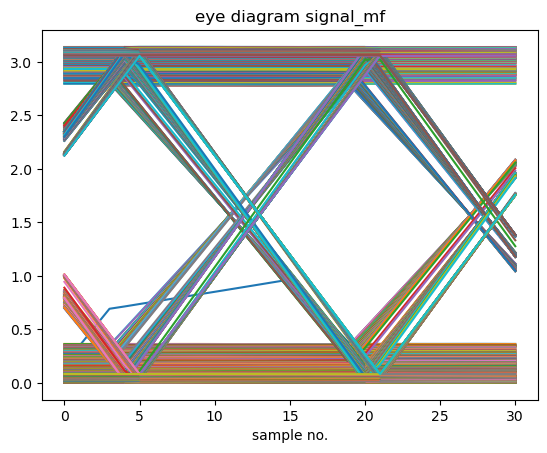

In [ ]:
# Eye diagram, skip first samples for maximum eye opening in the centre
signal_mf2 = signal_mf[0:nsamples_mf]

#range max. 1250 (number of bits/2 - 1)
for i in range(0, 1250):
    i1 = 2*i*osr
    i2 = 2*(i+1)*osr - 1
    plt.plot(signal_mf2[i1:i2])

plt.title('eye diagram signal_mf')
plt.xlabel('sample no.')
plt.show()


# Experiment no:- 4 Frame Synchronisation and Decoding

## 4.2 Frame synchronisation and Decoding

In [ ]:
def calc_crc10(data):
    crcReg = 0
    for byte in data:
        for i in range(8):
            if(((crcReg & 0x200) >> 2) ^ (byte & 0x80)):
                crcReg = ((crcReg << 1) & 0x3FF) ^ 0x1b9
            else:
                crcReg = ((crcReg << 1) & 0x3FF)
            byte = ((byte << 1) & 0xFF)
    return crcReg

In [ ]:
# Test CRC Function
calc_crc10([23, 128, 3, 56])

749

In [ ]:
# Downsample by 16 (1 sample/symbol)
signal_mf3 = scs.decimate(signal_mf2, 16, n = 0, ftype = 'fir')
# Generate unipolar binary sequence
data = (np.sign(signal_mf3 - 1.57) + 1)/2
nbits = len(data)
print("nbits =", nbits)


nbits = 2504


In [ ]:
frame_len = 50
frames_per_message = 16
preamble_len = 8
preamble = [1, 1, 1, 1, 1, 1, 1, 0]

nbr_frames = np.floor(nbits/frame_len)
print("nbr_frames =", nbr_frames)

nbr_frames = 50.0


In [ ]:
frame_sync = 0
start_bit = 0

# search for first frame, shift bit by bit, check for preamble and CRC
for i in range(0, nbits - (frame_len - 2)):
    test = data[i:(i + preamble_len)];
    if np.all(test == preamble):
        start_bit = i;
        bb = np.zeros(4)
        tf = data[(start_bit + 8):(start_bit + frame_len)]
        for k in range(4):
            byte = tf[(k*8):(k*8 + 8)]
            #byte to decimal
            bb[k] = byte[0]*2**7 + byte[1]*2**6 + byte[2]*2**5 + byte[3]*2**4 + byte[4]*2**3 + byte[5]*2**2 + byte[6]*2**1 + byte[7]*2**0
        bb = bb.astype(int)
        # Convert 10 bit CRC to decimal
        crc = tf[32]*2**9 + tf[33]*2**8 + tf[34]*2**7 + tf[35]*2**6 + tf[36]*2**5 + tf[37]*2**4 + tf[38]*2**3 + tf[39]*2**2 + tf[40]*2**1 + tf[41]*2**0
        crc = crc.astype(int)
        if crc == calc_crc10(bb):
            frame_sync = 1;
        break

print("frame_sync =", frame_sync, "     start_bit =", start_bit)

frame_sync = 1      start_bit = 35


In [ ]:
# Extract user data from at most 16 frames
nbr_frames_left = min(frames_per_message, (nbr_frames - np.floor(start_bit/frame_len)))
crc_errors = 0
txID = 0
msg = np.zeros(2*frames_per_message)

for i in range(nbr_frames_left):
    #Frame without preamble 42 bit
    bb = np.zeros(4)
    tf = data[(start_bit + 8 + i*frame_len):(start_bit + (i + 1)*frame_len)]
    #  4 bytes of data
    for k in range(4):
        byte = tf[(k*8):(k*8 + 8)]
        # Convert byte to decimal
        bb[k] = byte[0]*2**7 + byte[1]*2**6 + byte[2]*2**5 + byte[3]*2**4 + byte[4]*2**3 + byte[5]*2**2 + byte[6]*2**1 + byte[7]*2**0
    bb = bb.astype(int)
    # Convert 10 bit CRC to decimal
    crc = tf[32]*2**9 + tf[33]*2**8 + tf[34]*2**7 + tf[35]*2**6 + tf[36]*2**5 + tf[37]*2**4 + tf[38]*2**3 + tf[39]*2**2 + tf[40]*2**1 + tf[41]*2**0
    crc = crc.astype(int)
    if crc != calc_crc10(bb):
        crc_errors = crc_errors + 1
    #Extract txID and sequence number
    txID = bb[0]
    seq = bb[1] - 1
    #Recover user data sequence
    msg[2*seq] = bb[2]
    msg[2*seq + 1] = bb[3]
    msg = msg.astype(int)

# Convert message to characters
text = chr(msg[0])
for i in range(1, 2*frames_per_message):
    text = text + chr(msg[i])
print("txID: ", txID, "\ncrc errors: ", crc_errors, "\nMessage: ", text)

txID:  5 
crc errors:  0 
Message:  Decoding of Tx 5 successful!    


In [ ]:
nbr_frames_left

16

5.- Processing a Frequency Multiplexed Signal

The signal in file commsys_2023_2.mat is a frequency multiplexed signal with two carriers.

In [ ]:
# Plot spectrum in the frequency range -f_range.....+f_range

fs = 256e3
frame_size = 4096
# Load mat file
matfile = loadmat("D:\SUMMER SEMESTER\Communication Systems\Lab\commsys_2023_2.mat")
matfile

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Di Apr 25 12:54:54 2023',
 '__version__': '1.0',
 '__globals__': [],
 'signal': array([[-0.0078125+0.j       ,  0.       -0.0078125j,
          0.       +0.j       , ...,  0.5703125-0.328125j ,
         -0.34375  -0.2578125j, -0.2265625+0.6640625j],
        [ 0.96875  +0.5546875j,  0.9921875-0.78125j  ,
         -0.2109375-1.j       , ...,  0.9921875-0.7734375j,
         -0.109375 -1.j       , -1.       -0.4765625j],
        [-0.8046875+0.6171875j,  0.2421875+0.8046875j,
          0.71875  +0.0390625j, ...,  0.8984375+0.8359375j,
          0.9453125-0.28125j  ,  0.15625  -0.578125j ],
        ...,
        [-1.       -0.2734375j, -0.8984375+0.890625j ,
          0.3125   +0.9921875j, ..., -1.       +0.4453125j,
         -0.3359375+0.9921875j,  0.9296875+0.9921875j],
        [ 0.9921875-0.2265625j,  0.5234375-1.j       ,
         -0.7265625-1.j       , ...,  0.125    +0.9921875j,
          0.9921875+0.6328125j,  0.99218

In [ ]:
#extract samples
signal = matfile['signal']
print(signal.shape)

(157, 4096)


In [ ]:
#reshape matrix
signal = signal.reshape(1, 157*frame_size)
print(signal.shape)
signal

(1, 643072)


array([[-0.0078125+0.j       ,  0.       -0.0078125j,
         0.       +0.j       , ...,  0.6328125-0.1171875j,
         0.0703125-0.7578125j, -0.7734375-0.4609375j]], dtype=complex64)

In [ ]:
#convert to vector
signal = signal[0, :]
signal

array([-0.0078125+0.j       ,  0.       -0.0078125j,
        0.       +0.j       , ...,  0.6328125-0.1171875j,
        0.0703125-0.7578125j, -0.7734375-0.4609375j], dtype=complex64)

In [ ]:
#number of samples
nsamples = len(signal)
print("nsamples =", nsamples)

nsamples = 643072


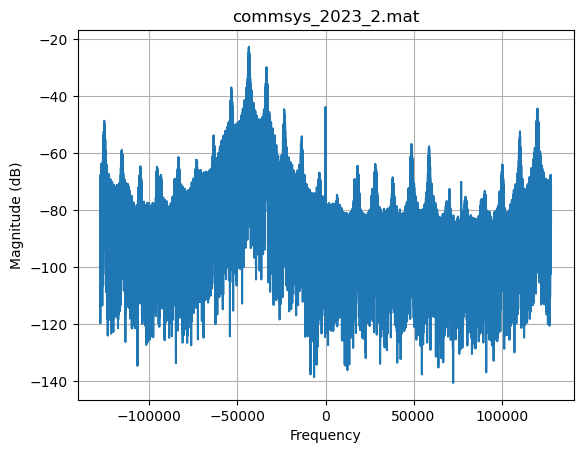

In [ ]:
mag_freq = plt.magnitude_spectrum(signal, Fs = fs, scale = 'dB')
#plt.magnitude_spectrum(signal, Fs=fs)
plt.title('commsys_2023_2.mat')
plt.grid()
plt.show()

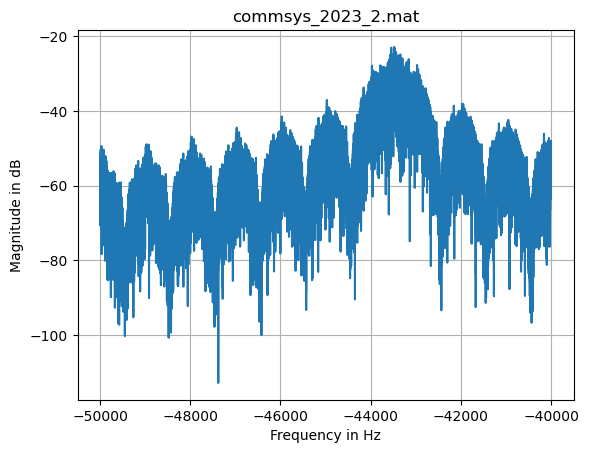

In [ ]:
#Plot spectrum in the frequency range f_low ... f_high
f_low = -50e3
f_high = -40e3

mag = mag_freq[0]
freq = mag_freq[1]

x1 = int(nsamples/2 + f_low*nsamples/fs)
x2 = int(nsamples/2 + f_high*nsamples/fs)
freq_zoom = freq[x1:x2]
mag_zoom = mag[x1:x2]

plt.plot(freq_zoom, 20*np.log10(mag_zoom))
plt.title('commsys_2023_2.mat')
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in dB')
plt.grid()
plt.show()

In [ ]:
max_index = np.argmax(mag_zoom)
max_spec = 20*np.log10(mag_zoom[max_index])
f_max = freq_zoom [max_index]
print('max_spec(dB) = ',max_spec,'at f (Hz) =', f_max)

max_spec(dB) =  -22.82451871175404 at f (Hz) = -43477.70700636943


In [ ]:
#Test complex exponential
np.exp(1j*np.pi/2)

(6.123233995736766e-17+1j)

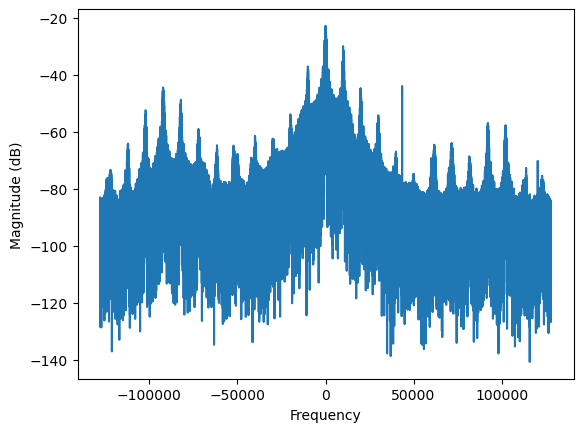

In [ ]:
delta_f = -43477.70700636943
time = np.arange(float(nsamples))/fs
exp_corr = np.exp(-2j*np.pi*delta_f*time)
signal_corr = signal*exp_corr
mag_freq = plt.magnitude_spectrum(signal_corr, Fs = fs, scale = 'dB')

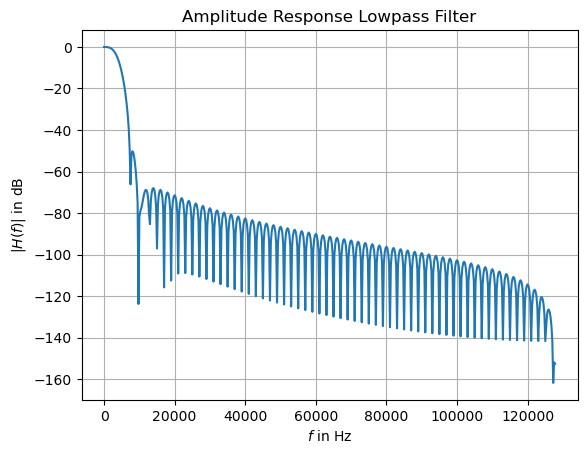

In [ ]:
#Define lowpass filter 4 kHz
b_LP = scs.firwin(128, 4e3/(fs/2))
f_LP, H_LP = scs.freqz(b_LP, fs = fs)
plt.plot(f_LP, 20*np.log10(abs(H_LP)))
plt.grid()
plt.title('Amplitude Response Lowpass Filter')
plt.xlabel('$f$ in Hz')
plt.ylabel('$|H(f)|$ in dB')
plt.show()

In [ ]:
# Filter signal_corr
signal_flt = scs.lfilter(b_LP, 1, signal_corr)
# Skip first 2000 samples
signal_flt = signal_flt[2000:nsamples]

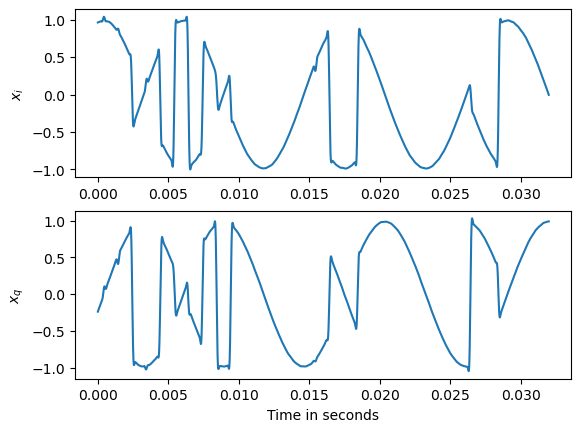

In [ ]:
# Plot quadrature components
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(time[0:2*frame_size], np.real(signal_flt[0:2*frame_size]))
plt.ylabel('$x_i$')
plt.subplot(2, 1, 2)
plt.plot(time[0:2*frame_size], np.imag(signal_flt[0:2*frame_size]))
plt.ylabel('$x_q$')
plt.xlabel('Time in seconds')
plt.show()

In [ ]:
# Downsample by 16 (16 samples/symbol)
signal_ds1 = scs.decimate(signal_flt, 16, n = 0, ftype = 'fir')
nsamples_ds1 = len(signal_ds1)
print("nsamples_ds1 =", nsamples_ds1)

nsamples_ds1 = 40067


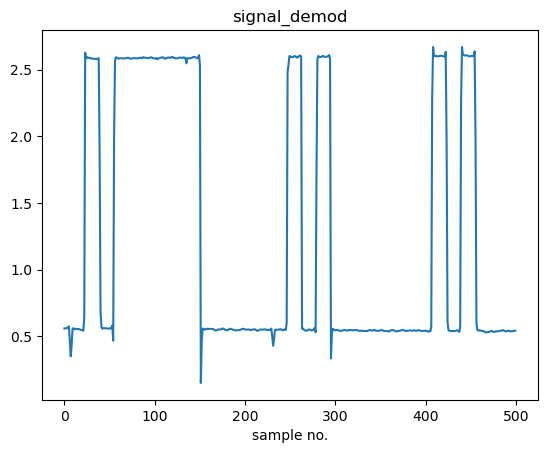

In [ ]:
# Matched filter, 16 samples/symbol
osr = 16
signal_mf = scs.lfilter(np.ones(osr)/osr, 1, signal_demod)
nsamples_mf = len(signal_mf)
print("nsamples_mf =", nsamples_mf)

plt.plot(signal_mf[0:500])
plt.title('signal_mf')
plt.xlabel('sample no.')
plt.show()

nsamples_mf = 40051


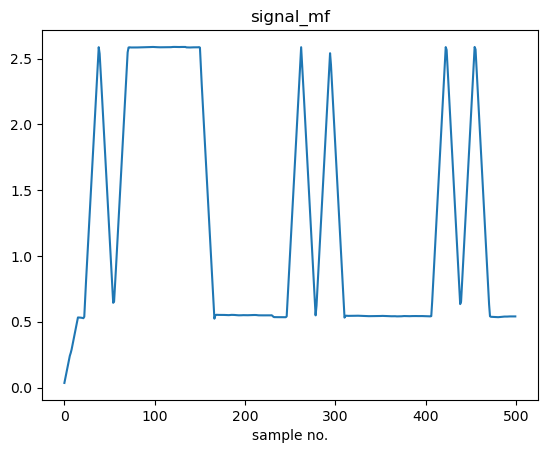

In [ ]:


# Demodulate signal
signal_demod = abs(np.angle(signal_ds1[16:nsamples_ds1]*np.conj(signal_ds1[0:(nsamples_ds1 - 16)])))
plt.plot(signal_demod[0:500])
plt.title('signal_demod')
plt.xlabel('sample no.')
plt.show()

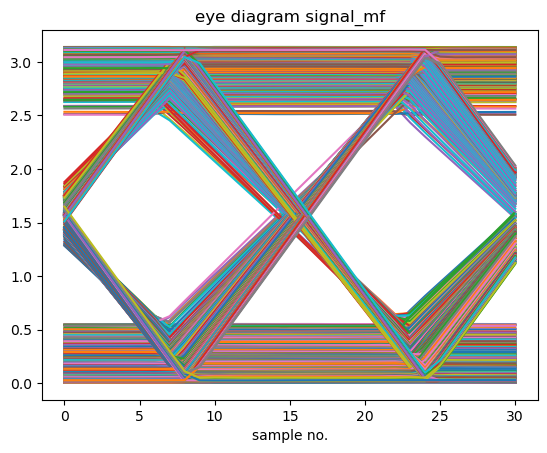

In [ ]:
# Eye diagram, skip first samples for maximum eye opening in center
signal_mf2 = signal_mf[0:nsamples_mf]

# range max. 1250 (number of bits/2 - 1)
for i in range(0, 1250):
    i1 = 2*i*osr
    i2 = 2*(i+1)*osr - 1
    plt.plot(signal_mf2[i1:i2])

plt.title('eye diagram signal_mf')
plt.xlabel('sample no.')
plt.show()

In [ ]:
# Downsample by 16 (1 sample/symbol)
signal_mf3 = scs.decimate(signal_mf2, 16, n = 0, ftype = 'fir')
# Generate unipolar binary sequence
data = (np.sign(signal_mf3 - 1.57) + 1)/2
nbits = len(data)
print("nbits =", nbits)

nbits = 2504


In [ ]:
frame_len = 50
frames_per_message = 16
preamble_len = 8
preamble = [1, 1, 1, 1, 1, 1, 1, 0]

nbr_frames = np.floor(nbits/frame_len)
print("nbr_frames =", nbr_frames)

nbr_frames = 50.0


In [ ]:
frame_sync = 0
start_bit = 0

# search for first frame, shift bit by bit, check for preamble and CRC
for i in range(0, nbits - (frame_len - 2)):
    test = data[i:(i + preamble_len)];
    if np.all(test == preamble):
        start_bit = i;
        bb = np.zeros(4)
        tf = data[(start_bit + 8):(start_bit + frame_len)]
        for k in range(4):
            byte = tf[(k*8):(k*8 + 8)]
            #byte to decimal
            bb[k] = byte[0]*2**7 + byte[1]*2**6 + byte[2]*2**5 + byte[3]*2**4 + byte[4]*2**3 + byte[5]*2**2 + byte[6]*2**1 + byte[7]*2**0
        bb = bb.astype(int)
        # Convert 10 bit CRC to decimal
        crc = tf[32]*2**9 + tf[33]*2**8 + tf[34]*2**7 + tf[35]*2**6 + tf[36]*2**5 + tf[37]*2**4 + tf[38]*2**3 + tf[39]*2**2 + tf[40]*2**1 + tf[41]*2**0
        crc = crc.astype(int)
        if crc == calc_crc10(bb):
            frame_sync = 1;
        break

print("frame_sync =", frame_sync, "     start_bit =", start_bit)

frame_sync = 1      start_bit = 103


In [ ]:
# Extract user data from at most 16 frames
nbr_frames_left = min(frames_per_message, (nbr_frames - np.floor(start_bit/frame_len)))
crc_errors = 0
txID = 0
msg = np.zeros(2*frames_per_message)

for i in range(nbr_frames_left):
    #Frame without preamble 42 bit
    bb = np.zeros(4)
    tf = data[(start_bit + 8 + i*frame_len):(start_bit + (i + 1)*frame_len)]
    #  4 bytes of data
    for k in range(4):
        byte = tf[(k*8):(k*8 + 8)]
        # Convert byte to decimal
        bb[k] = byte[0]*2**7 + byte[1]*2**6 + byte[2]*2**5 + byte[3]*2**4 + byte[4]*2**3 + byte[5]*2**2 + byte[6]*2**1 + byte[7]*2**0
    bb = bb.astype(int)
    # Convert 10 bit CRC to decimal
    crc = tf[32]*2**9 + tf[33]*2**8 + tf[34]*2**7 + tf[35]*2**6 + tf[36]*2**5 + tf[37]*2**4 + tf[38]*2**3 + tf[39]*2**2 + tf[40]*2**1 + tf[41]*2**0
    crc = crc.astype(int)
    if crc != calc_crc10(bb):
        crc_errors = crc_errors + 1
    #Extract txID and sequence number
    txID = bb[0]
    seq = bb[1] - 1
    #Recover user data sequence
    msg[2*seq] = bb[2]
    msg[2*seq + 1] = bb[3]
    msg = msg.astype(int)

# Convert message to characters
text = chr(msg[0])
for i in range(1, 2*frames_per_message):
    text = text + chr(msg[i])
print("txID: ", txID, "\ncrc errors: ", crc_errors, "\nMessage: ", text)

txID:  5 
crc errors:  0 
Message:  Decoding of Tx 5 successful!    


# 6 Lab Processing Signal  

In [ ]:
fs = 256e3
frame_size = 4096
# Load mat file
matfile = loadmat("D:\SUMMER SEMESTER\Communication Systems\Lab\signal_from_the_lab.mat")
matfile

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Jun 13 11:36:48 2023',
 '__version__': '1.0',
 '__globals__': [],
 'signal': array([[ 0.0078125+0.j       ,  0.       -0.0078125j,
         -0.0078125-0.0078125j, ...,  0.       -1.j       ,
         -0.234375 -1.j       , -0.5      -1.j       ],
        [-0.75     -1.j       , -0.953125 -1.j       ,
         -1.       -1.j       , ...,  0.578125 +0.9921875j,
          0.8203125+0.9921875j,  0.9921875+0.9921875j],
        [ 0.9921875+0.9296875j,  0.9921875+0.7109375j,
          0.9921875+0.4296875j, ...,  0.9921875+0.78125j  ,
          0.9921875+0.5859375j,  0.9921875+0.359375j ],
        ...,
        [ 0.9921875-0.0625j   ,  0.9921875-0.2890625j,
          0.9921875-0.453125j , ...,  0.8203125+0.9921875j,
          0.984375 +0.9921875j,  0.9921875+0.953125j ],
        [ 0.9921875+0.7890625j,  0.9921875+0.6171875j,
          0.9921875+0.40625j  , ..., -0.6796875-1.j       ,
         -0.8515625-1.j       , -1.    

In [ ]:
#extract samples
signal = matfile['signal']
print(signal.shape)

(157, 4096)


In [ ]:
#reshape matrix
signal = signal.reshape(1, 157*frame_size)
print(signal.shape)
signal

(1, 643072)


array([[ 0.0078125+0.j       ,  0.       -0.0078125j,
        -0.0078125-0.0078125j, ..., -1.       -1.j       ,
        -1.       -0.84375j  , -1.       -0.6953125j]])

In [ ]:
#convert to vector
signal = signal[0, :]
signal

array([ 0.0078125+0.j       ,  0.       -0.0078125j,
       -0.0078125-0.0078125j, ..., -1.       -1.j       ,
       -1.       -0.84375j  , -1.       -0.6953125j])

In [ ]:
#number of samples
nsamples = len(signal)
print("nsamples =", nsamples)

nsamples = 643072


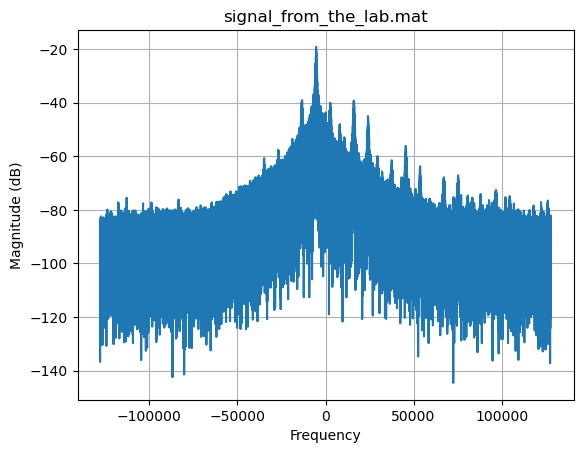

In [ ]:
mag_freq = plt.magnitude_spectrum(signal, Fs = fs, scale = 'dB')
plt.title('signal_from_the_lab.mat')
plt.grid()
plt.show()

## Estimating the frequency offset

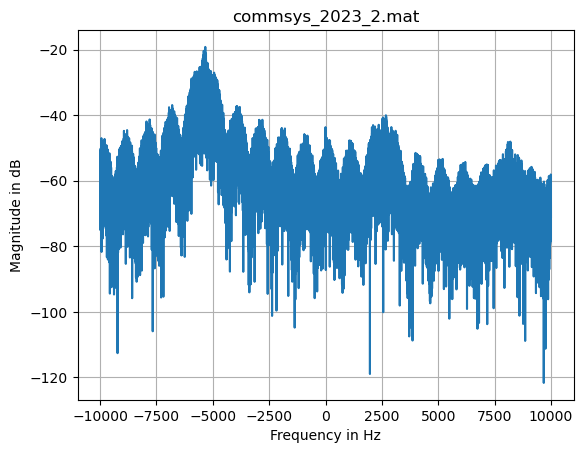

In [ ]:
# f_low ... f_high  spectrum in the f range ploten
f_low = -10e3
f_high = 10e3

mag = mag_freq[0]
freq = mag_freq[1]

x1 = int(nsamples/2 + f_low*nsamples/fs)
x2 = int(nsamples/2 + f_high*nsamples/fs)
freq_zoom = freq[x1:x2]
mag_zoom = mag[x1:x2]

plt.plot(freq_zoom, 20*np.log10(mag_zoom))
plt.title('commsys_2023_2.mat')
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in dB')
plt.grid()
plt.show()

## Coarse frequency correction

In [ ]:
max_index = np.argmax(mag_zoom)
max_spec = 20*np.log10(mag_zoom[max_index])
f_max = freq_zoom [max_index]
print('max_spec(dB) = ',max_spec,'at f (Hz) =', f_max)

max_spec(dB) =  -19.164945826992966 at f (Hz) = -5333.200636942675


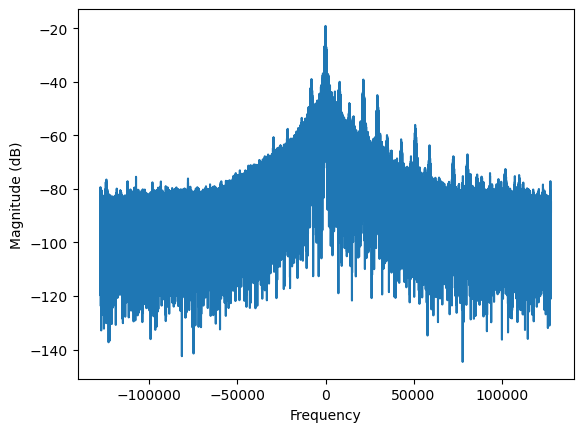

In [ ]:
delta_f = -5333.200636942675
time = np.arange(float(nsamples))/fs
exp_corr = np.exp(-2j*np.pi*delta_f*time)
signal_corr = signal*exp_corr
mag_freq = plt.magnitude_spectrum(signal_corr, Fs = fs, scale = 'dB')

## Matched filter  and Demodulator  

## Baseband filter

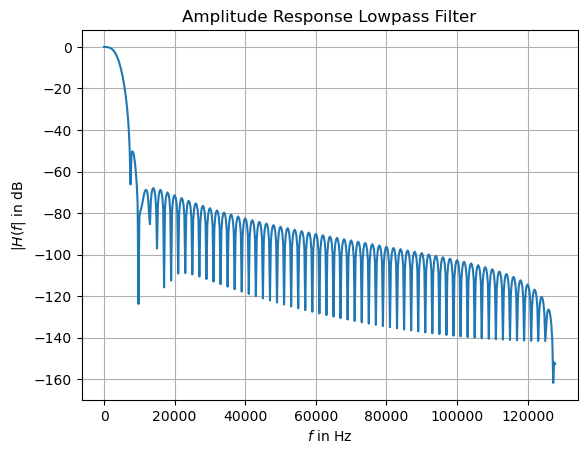

In [ ]:
# define lowpass filter 4 kHz
b_LP = scs.firwin(128, 4e3/(fs/2))
f_LP, H_LP = scs.freqz(b_LP, fs = fs)
plt.plot(f_LP, 20*np.log10(abs(H_LP)))
plt.grid()
plt.title('Amplitude Response Lowpass Filter')
plt.xlabel('$f$ in Hz')
plt.ylabel('$|H(f|$ in dB')
plt.show()

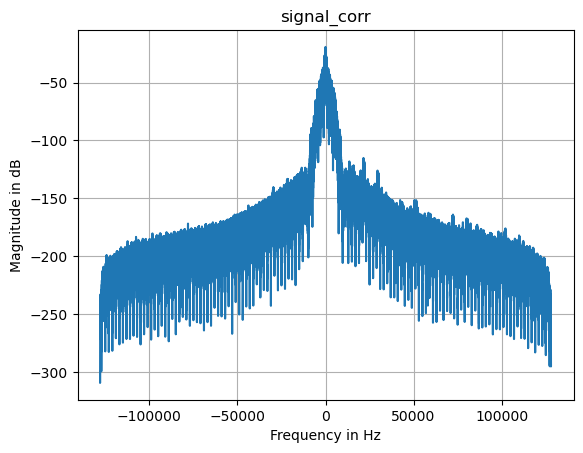

In [ ]:
# Filter signal_corr
signal_flt = scs.lfilter(b_LP, 1, signal_corr)
# Skip first 2000 samples
signal_flt = signal_flt[2000:nsamples]
mag_freq = plt.magnitude_spectrum(signal_flt, Fs = fs, scale = 'dB')
plt.title('signal_corr')
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in dB')
plt.grid()
plt.show()

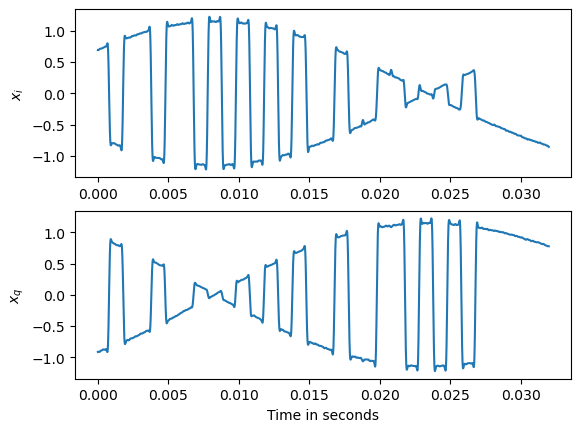

In [ ]:
# Plot quardrature components
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(time[0:2*frame_size], np.real(signal_flt[0:2*frame_size]))
plt.ylabel('$x_i$')
plt.subplot(2, 1, 2)
plt.plot(time[0:2*frame_size], np.imag(signal_flt[0:2*frame_size]))
plt.ylabel('$x_q$')
plt.xlabel('Time in seconds')
plt.show()

## DBPSK

In [ ]:
# Downsamplz by 16 (-> 16 samples/symbol)
signal_ds1 = scs.decimate(signal_flt, 16, n = 0, ftype = 'fir')
nsamples_ds1 = len(signal_ds1)
print("nsamples_ds1 =", nsamples_ds1)

nsamples_ds1 = 40067


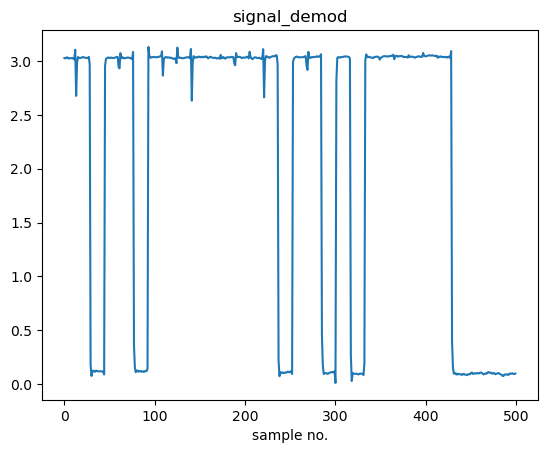

In [ ]:
# Demodulate signal
signal_demod = abs(np.angle(signal_ds1[16:nsamples_ds1]*np.conj(signal_ds1[0:(nsamples_ds1 - 16)])))
plt.plot(signal_demod[0:500])
plt.title('signal_demod')
plt.xlabel('sample no.')
plt.show()

## Matched Filter

nsamples_mf = 40051


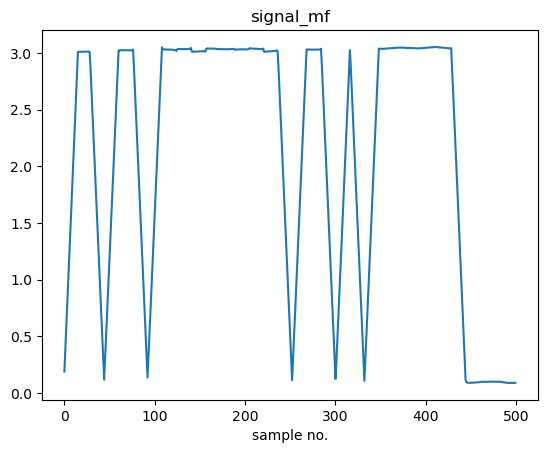

In [ ]:
# Matched Filter, 16 samples/symbol
osr = 16
signal_mf = scs.lfilter(np.ones(osr)/osr, 1, signal_demod)
nsamples_mf = len(signal_mf)
print("nsamples_mf =", nsamples_mf)

plt.plot(signal_mf[0:500])
plt.title('signal_mf')
plt.xlabel('sample no.')
plt.show()

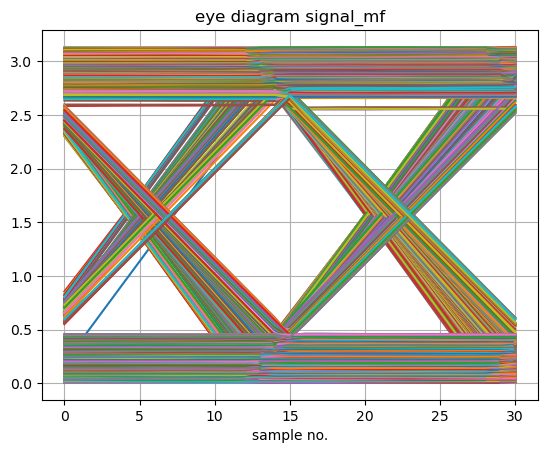

In [ ]:
# Eye diagram, skip first samples for maximum eye opening in center
signal_mf2 = signal_mf[:nsamples_mf]

# range max. 1250 (number of bits/2 - 1)
for i in range(0, 1250):
    i1 = 2*i*osr
    i2 = 2*(i + 1)*osr - 1
    plt.plot(signal_mf2[i1:i2])

plt.title('eye diagram signal_mf')
plt.xlabel('sample no.')
plt.grid()
plt.show()

## Decoding and Frame Synchronization  

In [ ]:
# Function calculate crc-10
# Generator polynomial (19 bit) 0x5b9, without leading 1:0x1b9
def calc_crc10(data):
    crcReg = 0
    for byte in data:
        for i in range(8):
            if (((crcReg & 0x200) >> 2) ^ (byte & 0x80)):
                crcReg = ((crcReg << 1) & 0x3FF) ^ 0x1b9
            else:
                crcReg = ((crcReg << 1) & 0x3Ff)
            byte = ((byte << 1) & 0xFF)
    return crcReg

In [ ]:
# Test CRC function
calc_crc10([23, 128, 3, 56])

749

In [ ]:
# Downsample by 16 (-> 1 sample/symbol)
signal_mf3 = scs.decimate(signal_mf2, 16, n = 0, ftype = 'fir')
# Generate unipolar binary sequence
data = (np.sign(signal_mf3 - 1.57) +1)/2
nbits = len(data)
print("nbits =", nbits)

nbits = 2504


In [ ]:
frame_len = 50
frames_per_message = 16
preamble_len = 8
preamble = [1, 1, 1, 1, 1, 1, 1, 0]

nbr_frames = np.floor(nbits/frame_len)
print("nbr_frames =", nbr_frames)
data

nbr_frames = 50.0


array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
frame_sync = 0
start_bit = 0

# search for first frame, shift bit by bit, check for preamble and CRC
for i in range(0, nbits - (frame_len - 2)):
    test = data[i:(i + preamble_len)]
    if np.all(test == preamble):
        start_bit = i;
        bb = np.zeros(4)
        tf = data[(start_bit + 8):(start_bit + frame_len)]
        for k in range(4):
            byte = tf[(k*8):(k*8 + 8)]

            # convert byte to decimal
            bb[k] = byte[0]*2**7 + byte[1]*2**6 + byte[2]*2**5 + byte[3]*2**4 + byte[4]*2**3 + byte[5]*2**2 + byte[6]*2**1 + byte[7]*2**0
        bb = bb.astype(int)

        # convert 10 bit CRC to decimal
        crc = tf[32]*2**9 + tf[33]*2**8 + tf[34]*2**7 + tf[35]*2**6 + tf[36]*2**5 + tf[37]*2**4 + tf[38]*2**3 + tf[39]*2**2 + tf[40]*2**1 + tf[41]*2**0
        crc = crc.astype(int)

        # check CRC
        if crc == calc_crc10(bb):
            frame_sync = 1;
            break
print("frame_sync =", frame_sync, " start_bit =", start_bit)

frame_sync = 1  start_bit = 121


In [ ]:
# Extract user data from at most 16 frames
frames_per_message = 16
nbr_frames_left = min(frames_per_message, (nbr_frames - np.floor(start_bit/frame_len)))
crc_errors = 0
txID = 0
msg = np.zeros(2*frames_per_message)

for i in range(nbr_frames_left):
    # Frame without preamble 42 bit
    bb = np.zeros(4)
    tf = data[(start_bit + 8 + i*frame_len):(start_bit + (i+1)*frame_len)]
     # 4 bytes of data
    for k in range(4):
        byte = tf[(k*8):(k*8 + 8)]
        # convert byte to decimal
        bb[k] = byte[0]*2**7 + byte[1]*2**6 + byte[2]*2**5 + byte[3]*2**4 + byte[4]*2**3 + byte[5]*2**2 + byte[6]*2**1 + byte[7]*2**0
    bb = bb.astype(int)
    # Convert 10 bit CRC to decimal
    crc = tf[32]*2**9 + tf[33]*2**8 + tf[34]*2**7 + tf[35]*2**6 + tf[36]*2**5 + tf[37]*2**4 + tf[38]*2**3 + tf[39]*2**2 + tf[40]*2**1 + tf[41]*2**0
    crc = crc.astype(int)
    # check CRC
    if crc != calc_crc10(bb):
        crc_errors = crc_errors + 1
    # Extract txID and sequence number
    txID = bb[0]
    seq = bb[1] - 1
    # Recover user data sequence
    msg[2*seq] = bb[2]
    msg[2*seq + 1] = bb[3]
    msg = msg.astype(int)

# convert message to characters
text = chr(msg[0])
for i in range(1, 2*frames_per_message):
    text = text + chr(msg[i])
print("txID =", txID)
print("Number of crc errors =", crc_errors)
print("Text :", text)


txID = 1
Number of crc errors = 0
Text : To boldly go where no man has   
